## Análise Exploraória de Dados

In [1]:
import pandas as pd
import os
from termcolor import colored
from IPython.display import display
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

caminho = '../data/raw'

# Leitura dos conjuntos de dados
tabelas = {
    os.path.splitext(arquivo)[0]: pd.read_csv(os.path.join(caminho, arquivo))
    for arquivo in os.listdir(caminho)
    if arquivo.endswith('.csv')
}

# Exibir
for nome, df in tabelas.items():
    print(colored(f'\n=== {nome.upper()} ===', 'blue', attrs=['bold']))
    print(f'Shape: {df.shape}')
    print('Nulos por coluna:')
    print(df.isnull().sum())
    display(df.head(3))



=== DELIVERIES ===
Shape: (378843, 5)
Nulos por coluna:
delivery_id                     0
delivery_order_id               0
driver_id                   15886
delivery_distance_meters       73
delivery_status                 0
dtype: int64


,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
0,2174658,68413340,8378.0,5199.0,DELIVERED
1,2174660,68414309,2473.0,410.0,DELIVERED
2,2174661,68416230,7615.0,3784.0,DELIVERED



=== STORES ===
Shape: (951, 7)
Nulos por coluna:
store_id              0
hub_id                0
store_name            0
store_segment         0
store_plan_price    115
store_latitude       16
store_longitude      16
dtype: int64


,store_id,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude
0,3,2,CUMIURI,FOOD,0.0,NaN,NaN
1,6,3,PIMGUCIS DA VIVA,FOOD,0.0,-30.037415,-51.20352
2,8,3,RASMUR S,FOOD,0.0,-30.037415,-51.20352



=== ORDERS ===
Shape: (368999, 29)
Nulos por coluna:
order_id                                  0
store_id                                  0
channel_id                                0
payment_order_id                          0
delivery_order_id                         0
order_status                              0
order_amount                              0
order_delivery_fee                        0
order_delivery_cost                    7205
order_created_hour                        0
order_created_minute                      0
order_created_day                         0
order_created_month                       0
order_created_year                        0
order_moment_created                      0
order_moment_accepted                  9461
order_moment_ready                    25106
order_moment_collected                42894
order_moment_in_expedition            67429
order_moment_delivering               25316
order_moment_delivered               349398
order_moment_finished 

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
0,68405119,3512,5,68405119,68405119,CANCELED,62.7,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68405123,3512,5,68405123,68405123,CANCELED,62.7,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68405206,3512,5,68405206,68405206,CANCELED,115.5,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



=== DRIVERS ===
Shape: (4824, 3)
Nulos por coluna:
driver_id       0
driver_modal    0
driver_type     0
dtype: int64


,driver_id,driver_modal,driver_type
0,133,MOTOBOY,LOGISTIC OPERATOR
1,138,MOTOBOY,FREELANCE
2,140,MOTOBOY,FREELANCE



=== HUBS ===
Shape: (32, 6)
Nulos por coluna:
hub_id           0
hub_name         0
hub_city         0
hub_state        0
hub_latitude     0
hub_longitude    0
dtype: int64


,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
0,2,BLUE SHOPPING,PORTO ALEGRE,RS,-30.047415,-51.213510
1,3,GREEN SHOPPING,PORTO ALEGRE,RS,-30.037415,-51.203520
2,4,RED SHOPPING,PORTO ALEGRE,RS,-30.021948,-51.208382



=== PAYMENTS ===
Shape: (400834, 6)
Nulos por coluna:
payment_id            0
payment_order_id      0
payment_amount        0
payment_fee         175
payment_method        0
payment_status        0
dtype: int64


,payment_id,payment_order_id,payment_amount,payment_fee,payment_method,payment_status
0,4427917,68410055,118.44,0.00,VOUCHER,PAID
1,4427918,68410055,394.81,7.90,ONLINE,PAID
2,4427941,68412721,206.95,5.59,ONLINE,PAID



=== CHANNELS ===
Shape: (40, 3)
Nulos por coluna:
channel_id      0
channel_name    0
channel_type    0
dtype: int64


,channel_id,channel_name,channel_type
0,1,OTHER PLACE,OWN CHANNEL
1,2,PHONE PLACE,OWN CHANNEL
2,3,WHATS PLACE,OWN CHANNEL


## 📊 Resumo das Tabelas Carregadas

Foram carregadas **7 tabelas** referentes ao ecossistema de pedidos e entregas:

- **DELIVERIES**: 378.843 entregas registradas, com poucas ausências em `driver_id` e `delivery_distance_meters`.

- **STORES**: 951 lojas cadastradas; algumas com coordenadas geográficas e plano de preço ausentes.

- **ORDERS**: 368.999 pedidos com rastreamento detalhado de status e tempos. Vários campos relacionados a momentos da entrega contêm valores ausentes (esperado para pedidos cancelados ou incompletos).

- **DRIVERS**: 4.824 entregadores, com `modal` e `tipo` definidos.

- **HUBS**: 32 centros de distribuição totalmente preenchidos.

- **PAYMENTS**: 400.834 registros de pagamento; pequenas ausências na taxa (`payment_fee`).

- **CHANNELS**: 40 canais de venda distintos, sem valores nulos.


## Tratamento de Dados

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/processed/dataset_final.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442239 entries, 0 to 442238
Data columns (total 54 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           442239 non-null  int64  
 1   store_id                           442239 non-null  int64  
 2   channel_id                         442239 non-null  int64  
 3   payment_order_id_x                 442239 non-null  int64  
 4   delivery_order_id                  442239 non-null  int64  
 5   order_status                       442239 non-null  object 
 6   order_amount                       442239 non-null  float64
 7   order_delivery_fee                 442239 non-null  float64
 8   order_delivery_cost                432138 non-null  float64
 9   order_created_hour                 442239 non-null  int64  
 10  order_created_minute               442239 non-null  int64  
 11  order_created_day                  4422

O **DataFrame** analisado possui 442.239 registros e 54 colunas, contendo informações detalhadas sobre pedidos, entregas, pagamentos, lojas, hubs e motoristas. Os dados apresentam uma boa variedade de tipos, incluindo números, textos e datas, mas muitas colunas possuem valores ausentes, especialmente aquelas relacionadas às etapas do processo de entrega e aos detalhes de pagamento, o que pode indicar pedidos ainda em andamento ou registros incompletos. No geral, o conjunto de dados é bastante rico e permite diversas análises, como desempenho logístico, eficiência operacional, comportamento dos pedidos ao longo do tempo e distribuição geográfica das operações.


In [4]:
# Mapeamento de Valores Nulos

missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Total': missing, 'Percentual (%)': missing_percent})
missing_df = missing_df[missing_df['Total'] > 0].sort_values('Percentual (%)', ascending=False)
missing_df


,Total,Percentual (%)
order_moment_delivered,416561,94.193637
store_plan_price,94444,21.355873
order_metric_walking_time,84619,19.134224
order_metric_paused_time,81301,18.383951
order_moment_in_expedition,76337,17.261481
order_metric_collected_time,57745,13.057419
order_moment_collected,47112,10.653063
order_metric_expediton_speed_time,38941,8.805420
order_metric_transit_time,28022,6.336393
order_metric_production_time,27821,6.290942


1. **Mais de 90% de nulos (Exemplo: `order_moment_delivered`)**
   - Excluir colunas com alto percentual de nulos, pois não agregam valor significativo à análise.

2. **15% a 30% de nulos (Exemplo: `store_plan_price`, `order_metric_walking_time`)**
   - Imputar com mediana ou média, para evitar distorções por outliers ou valores extremos.

3. **6% a 15% de nulos (Exemplo: `order_metric_collected_time`, `driver_id`)**
   - Imputar com valores como "UNKNOWN" para dados categóricos e com a média ou mediana para dados numéricos.

4. **2% a 5% de nulos (Exemplo: `delivery_distance_meters`, `delivery_status`)**
   - Imputar com "UNKNOWN" para dados categóricos e com a mediana para dados numéricos.

5. **Menos de 1% de nulos (Exemplo: `store_latitude`, `store_longitude`)**
   - Imputar com a média para dados numéricos, pois a quantidade de nulos é muito pequena para impactar a análise.

In [5]:
# Tratamento de valores faltantes

# 1. Excluir colunas com mais de 90% de nulos
df.drop(columns=['order_moment_delivered'], inplace=True)

# 2. Imputar com mediana (valores numéricos contínuos)
cols_mediana = ['store_plan_price', 'order_metric_walking_time', 'order_metric_paused_time']
for col in cols_mediana:
    df[col] = df[col].fillna(df[col].median())

# 3. Imputar com média (valores de tempo contínuos)
tempo_cols = ['order_metric_collected_time', 'order_metric_expediton_speed_time', 'order_metric_transit_time']
for col in tempo_cols:
    df[col] = df[col].fillna(df[col].mean())

# 4. Imputar driver info com 'UNKNOWN'
driver_cols = ['driver_modal', 'driver_type', 'driver_id']
for col in driver_cols:
    df[col] = df[col].fillna('UNKNOWN')

# 5. Timestamps intermediários - manter como nulo (análise posterior ou possível inferência futura)

# 6. Imputar colunas de pagamento
payment_cols = ['payment_id', 'payment_order_id_y', 'payment_method', 'payment_status']
for col in payment_cols:
    df[col] = df[col].fillna('UNKNOWN')

# Pagamentos numéricos
df['payment_amount'] = df['payment_amount'].fillna(0)
df['payment_fee'] = df['payment_fee'].fillna(0)

# 7. Demais colunas de tempo
df['order_metric_cycle_time'] = df['order_metric_cycle_time'].fillna(df['order_metric_cycle_time'].mean())
df['order_metric_production_time'] = df['order_metric_production_time'].fillna(df['order_metric_production_time'].mean())

# 8. Delivery e localização
df['delivery_status'] = df['delivery_status'].fillna('UNKNOWN')
df['delivery_distance_meters'] = df['delivery_distance_meters'].fillna(df['delivery_distance_meters'].median())
df['order_delivery_cost'] = df['order_delivery_cost'].fillna(df['order_delivery_cost'].median())

# 9. Coordenadas geográficas (imputar com média geral)
df['store_latitude'] = df['store_latitude'].fillna(df['store_latitude'].mean())
df['store_longitude'] = df['store_longitude'].fillna(df['store_longitude'].mean())


Para garantir a qualidade dos dados utilizados na análise, diferentes estratégias foram aplicadas conforme o tipo e a proporção de valores ausentes.

Colunas com mais de 90% de nulos foram excluídas por não apresentarem valor analítico relevante, reduzindo ruído e dimensionalidade. Variáveis contínuas com outliers foram imputadas com a mediana, enquanto variáveis temporais contínuas receberam a média para preservar a tendência central.

Campos categóricos, como informações de motoristas e métodos de pagamento, foram preenchidos com **UNKNOWN** para manter relações importantes e permitir análises futuras. Valores nulos em timestamps intermediários foram mantidos, pois sua ausência pode ter significado analítico.

Campos numéricos de pagamento foram preenchidos com zero, interpretando a ausência como falta de transação. Distância e custo de entrega foram imputados com a mediana para evitar distorções, enquanto coordenadas geográficas foram preenchidas com a média para manter a coerência espacial dos dados.


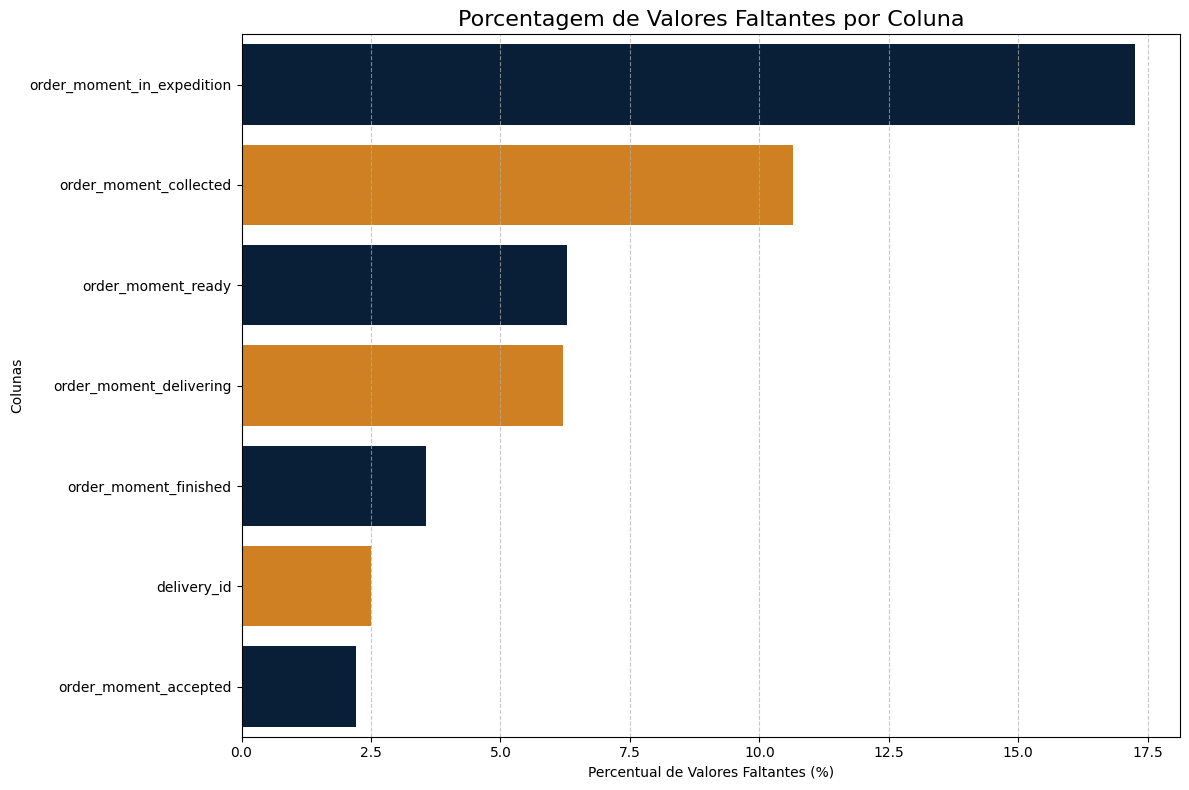

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a porcentagem de valores nulos por coluna
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_percent = missing_percent[missing_percent > 0]  # Apenas colunas com nulos

# Definir as cores personalizadas
colors = ['#001F3F', '#EC8305'] * (len(missing_percent) // 2 + 1)  # Alternando entre as cores

# Plotar gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_percent.values, y=missing_percent.index, hue=missing_percent.index, palette=colors[:len(missing_percent)], legend=False)
plt.title('Porcentagem de Valores Faltantes por Coluna', fontsize=16)
plt.xlabel('Percentual de Valores Faltantes (%)')
plt.ylabel('Colunas')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


O gráfico acima apresenta a porcentagem de valores faltantes em cada coluna do dataset. Essa análise é essencial para entender a qualidade dos dados e direcionar decisões sobre tratamentos adequados.

Observa-se que algumas colunas possuem altos índices de ausência, como **order_moment_delivered** (≈94%), **store_plan_price** (≈21%) e **order_metric_walking_time** (≈19%). Esses campos são críticos para o entendimento da jornada do pedido e performance logística.

A partir dessa visualização, foram tomadas decisões específicas para cada grupo de colunas:

- **Valores com baixa ausência (<5%)**: tratados por imputação ou remoção de linhas sem grande impacto estatístico.
- **Valores com ausência moderada (5% a 20%)**: analisados quanto à relevância para os modelos e visualizações, optando por imputação com base em estatísticas da amostra.
- **Valores com ausência alta (>20%)**: avaliados para possível exclusão ou para tratamentos avançados como modelagem preditiva de imputação.

In [7]:
# Tratamento Geral

for nome, df in tabelas.items():
    print(f'\nTratando: {nome.upper()}')

    # 1. Padronização de nomes de colunas
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

    # 2. Remoção de duplicatas
    linhas_antes = df.shape[0]
    df.drop_duplicates(inplace=True)
    linhas_depois = df.shape[0]
    print(f'  - Duplicatas removidas: {linhas_antes - linhas_depois}')

    # 3. Verificação de consistência
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f'  - Coluna "{col}" tem valores únicos: {df[col].nunique()}')
        else:
            print(f'  - Coluna "{col}" tem tipo: {df[col].dtype} e valores únicos: {df[col].nunique()}')

    print(f'  - Tratamentos gerais concluídos.')



Tratando: DELIVERIES
  - Duplicatas removidas: 0
  - Coluna "delivery_id" tem tipo: int64 e valores únicos: 378843
  - Coluna "delivery_order_id" tem tipo: int64 e valores únicos: 358654
  - Coluna "driver_id" tem tipo: float64 e valores únicos: 4583
  - Coluna "delivery_distance_meters" tem tipo: float64 e valores únicos: 16477
  - Coluna "delivery_status" tem valores únicos: 3
  - Tratamentos gerais concluídos.

Tratando: STORES
  - Duplicatas removidas: 0
  - Coluna "store_id" tem tipo: int64 e valores únicos: 951
  - Coluna "hub_id" tem tipo: int64 e valores únicos: 32
  - Coluna "store_name" tem valores únicos: 480
  - Coluna "store_segment" tem valores únicos: 2
  - Coluna "store_plan_price" tem tipo: float64 e valores únicos: 10
  - Coluna "store_latitude" tem tipo: float64 e valores únicos: 92
  - Coluna "store_longitude" tem tipo: float64 e valores únicos: 87
  - Tratamentos gerais concluídos.

Tratando: ORDERS
  - Duplicatas removidas: 0
  - Coluna "order_id" tem tipo: int64

**Tratamento de Duplicatas:**

Para todas as tabelas (DELIVERIES, STORES, ORDERS, DRIVERS, HUBS, PAYMENTS e CHANNELS), o código tentou remover duplicatas.

No entanto, o resultado mostra que não foram removidas duplicatas em nenhuma das tabelas, ou seja, não havia registros duplicados nos dados que estamos analisando.

**Impressão dos Resultados**:

O código exibiu um resumo para cada tabela com duas informações principais:

- **Duplicatas removidas**: 0 para todas as tabelas, indicando que não havia registros duplicados.

**Conclusões**:

- Não há duplicatas nas tabelas, o que é um bom sinal de que os dados estão bem organizados e sem redundâncias.
- O processo de limpeza e preparação dos dados foi bem-sucedido, garantindo que as tabelas estejam mais consistentes e prontas para análise posterior.


## Resumo Estatístico Geral dos Dados

In [8]:
df = pd.read_csv('../data/processed/dataset_final.csv')
df.describe(include='all')

,order_id,store_id,channel_id,payment_order_id_x,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,driver_id,delivery_distance_meters,delivery_status,driver_modal,driver_type,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
count,4.422390e+05,442239.000000,442239.000000,4.422390e+05,4.422390e+05,442239,4.422390e+05,442239.000000,432138.000000,442239.000000,...,414427.000000,4.311110e+05,431184,414427,414427,442239,442239,442239,442239.000000,442239.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,3,2,2,32,4,4,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,FINISHED,NaN,NaN,NaN,NaN,...,NaN,NaN,DELIVERED,MOTOBOY,FREELANCE,GOLDEN SHOPPING,SÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,SP,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,424906,NaN,NaN,NaN,NaN,...,NaN,NaN,423675,302172,295235,54967,196143,196143,NaN,NaN
mean,8.235591e+07,1269.036417,7.752708,8.235591e+07,8.235591e+07,NaN,1.006244e+02,5.885275,7.511628,16.722379,...,21007.130935,9.694615e+03,NaN,NaN,NaN,NaN,NaN,NaN,-24.129915,-46.076996
std,6.982708e+06,1189.666317,8.141471,6.982708e+06,6.982708e+06,NaN,2.697975e+03,6.109197,4.257308,6.104885,...,15463.477075,2.170473e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.055516,2.534145
min,6.840512e+07,3.000000,1.000000,6.840512e+07,6.840512e+07,NaN,0.000000e+00,0.000000,0.000000,0.000000,...,133.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,-30.085743,-51.245997
25%,7.657809e+07,415.000000,5.000000,7.657809e+07,7.657809e+07,NaN,3.880000e+01,0.000000,5.300000,15.000000,...,7638.000000,1.165000e+03,NaN,NaN,NaN,NaN,NaN,NaN,-23.622995,-46.718197
50%,8.323702e+07,806.000000,5.000000,8.323702e+07,8.323702e+07,NaN,6.780000e+01,5.990000,7.350000,17.000000,...,18791.000000,2.046000e+03,NaN,NaN,NaN,NaN,NaN,NaN,-23.561053,-46.624152
75%,8.795190e+07,1930.000000,5.000000,8.795190e+07,8.795190e+07,NaN,1.170000e+02,11.900000,8.860000,22.000000,...,31048.000000,3.446000e+03,NaN,NaN,NaN,NaN,NaN,NaN,-22.969880,-43.370811


**Variáveis numéricas principais**:

- **order_id, store_id, channel_id, payment_order_id_x, delivery_order_id**: Estas colunas representam identificadores exclusivos para os pedidos, lojas, canais de pagamento e entregas. Como esperado, os valores para essas colunas possuem uma contagem de 442.239 registros, com valores únicos que não são aplicáveis a essas colunas, pois são identificadores de registros.

- **order_amount**: Refere-se ao valor do pedido. A média é de aproximadamente 100,62 unidades monetárias, com um desvio padrão considerável de 2.698, sugerindo uma grande variação nos valores dos pedidos. O valor mínimo registrado foi 0,00, o que pode indicar dados faltantes ou pedidos com valor simbólico, e o valor máximo foi de 1.788.306,00 unidades monetárias, representando um grande pico nas transações.

- **order_delivery_fee e order_delivery_cost**: Essas colunas representam, respectivamente, as taxas de entrega e os custos de entrega. As médias são de 5,89 e 7,51, com desvios padrão de 6,11 e 4,26, respectivamente. Isso indica que, apesar de a maioria das taxas e custos de entrega serem mais baixos, há uma variação significativa, possivelmente devido a diferentes tipos de entregas ou áreas geográficas.

- **delivery_distance_meters**: Representa a distância da entrega. A média é de cerca de 9.694 metros, com um desvio padrão de 217.047 metros, o que sugere uma grande dispersão nos dados. Algumas entregas são significativamente mais distantes do que outras, com um valor mínimo de 0 metros e um máximo de mais de 7 milhões de metros (provavelmente um erro de entrada de dados ou um valor extremo).

**Variáveis categóricas principais**:

- **order_status**: A maior parte dos pedidos foi registrada como "FINISHED" (424.906 ocorrências), indicando que a maioria das transações foi concluída com sucesso. A distribuição de status de pedidos é desbalanceada, com uma predominância de pedidos finalizados.

- **delivery_status**: A maioria das entregas tem o status "DELIVERED", com 423.675 ocorrências, indicando que a maioria dos pedidos foi entregue conforme esperado. Isso também reflete uma distribuição desbalanceada, com outros status ocorrendo de forma muito menos frequente.

- **driver_modal e driver_type**: A maioria dos motoristas parece ser do tipo "MOTOBOY" e "FREELANCE", com 302.172 e 295.235 ocorrências, respectivamente. Isso pode sugerir que o modelo de negócios prioriza entregas rápidas e flexíveis.

- **hub_name, hub_city, hub_state**: As hubs de entrega estão distribuídas principalmente em cidades como "GOLDEN SHOPPING" e localizadas em estados como "SP", o que é consistente com o padrão geográfico da operação.

**Geolocalização**:

- **hub_latitude e hub_longitude**: As coordenadas geográficas das hubs de entrega variam amplamente, com algumas hubs localizadas em posições extremas. As latitudes variam entre -30,09 e -22,89, enquanto as longitudes variam entre -51,25 e -43,18, refletindo a cobertura geográfica extensa das operações de entrega.

**Observações adicionais**:

- **Distribuição dos valores**: A distribuição das variáveis como o valor do pedido (order_amount), taxas de entrega (order_delivery_fee) e distâncias de entrega (delivery_distance_meters) apresentam uma grande dispersão. Isso pode ser um indicativo de diferentes tipos de pedidos e entregas (por exemplo, pedidos pequenos versus grandes, ou entregas urbanas versus rurais).

- **Valores nulos e dados faltantes**: Algumas colunas apresentam valores nulos ou faltantes (como delivery_status, driver_modal e driver_type), o que pode exigir uma análise mais aprofundada para decidir como tratá-los (como remoção, imputação ou análise separada).

**Conclusão**

A análise estatística revela que o sistema de pedidos e entregas da plataforma opera com uma grande quantidade de dados e com uma variedade de valores, como transações de valores baixos e elevados, distâncias de entrega variadas e diferentes tipos de motoristas e hubs. A predominância de status "FINISHED" e "DELIVERED" sugere uma operação eficiente, mas a variabilidade nas distâncias de entrega e nos valores dos pedidos pode indicar áreas para otimização, como ajustes de rotas de entrega ou personalização das taxas de entrega conforme o tipo de pedido.

In [9]:
# Análise de Assimetria (Skew) e Curtose (Kurtosis)
df.select_dtypes(include=['number']).agg(['skew', 'kurt'])


,order_id,store_id,channel_id,payment_order_id_x,delivery_order_id,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,...,store_longitude,payment_id,payment_order_id_y,payment_amount,payment_fee,delivery_id,driver_id,delivery_distance_meters,hub_latitude,hub_longitude
skew,-0.277764,1.141677,3.466293,-0.277764,-0.277764,658.515404,23.899504,6.895325,-1.552186,0.007714,...,-0.514887,-0.016425,-0.278550,238.926596,222.260958,-0.010776,0.566740,31.667657,-2.274051,-0.513969
kurt,-1.060476,0.093180,12.283845,-1.060476,-1.060476,436384.121181,2632.550791,129.644910,2.077918,-1.191406,...,-0.609774,-1.194535,-1.057952,103424.522688,94249.325845,-1.180416,-0.548019,1002.486254,3.782418,-0.608557


**Análise de Assimetria (Skew) e Curtose (Kurtosis)**

A análise estatística foi aprofundada com o cálculo da assimetria (skew) e curtose (kurtosis), que ajudam a entender a distribuição dos dados além da média e desvio padrão. Skew positivo indica cauda longa à direita; kurtose alta revela presença de outliers e caudas pesadas.

A variável **`order_amount`** foi a mais impactante, com skew de **658,5** e curtose acima de **436 mil**, evidenciando pedidos geralmente baixos, mas com poucos valores extremamente altos. Isso indica a necessidade de tratamento, como **transformação logarítmica ou remoção de outliers**.

Variáveis como **`order_delivery_fee`** (skew 23,9) e **`order_delivery_cost`** (skew 6,89) também mostraram distribuições assimétricas, com maioria dos valores baixos e alguns muito elevados. Isso pode refletir **entregas especiais ou distantes**.

A variável **`delivery_distance_meters`** apresentou skew de **31,6** e kurtose acima de **1.000**, sugerindo **extremos fora da curva** que distorcem a média e devem ser analisados.

Além disso, as variáveis seguintes também apresentaram comportamentos notáveis:

- **`channel_id`** (skew 3,46): um canal de vendas é muito mais utilizado em relação aos outros, sugerindo um padrão de compras concentrado.
- **`order_created_hour`** (skew -1,55): a maioria dos pedidos ocorre no final do dia.
- **`store_longitude`** (skew -0,51): um comportamento levemente assimétrico à esquerda, com variação mais concentrada em longitudes menores.
- **`payment_amount`** (skew 238,9): extremamente assimétrica, indicando que os pagamentos de valor mais alto são raros, mas com grande impacto na distribuição.
- **`delivery_distance_meters`** (skew 31,66, kurtose 1002,5): grandes distâncias de entrega, indicando casos de entregas mais longas ou até erros de digitação em alguns dados.

Por fim, as variáveis geográficas de localização das hubs:

- **`hub_latitude`** (skew -2,27): leve concentração em regiões com menores latitudes, como o sul do país.
- **`hub_longitude`** (skew -0,51): distribuição relativamente equilibrada, mas com uma ligeira concentração na região leste.

Em resumo, a análise de skew e kurtosis permitiu identificar importantes desvios de distribuição que podem influenciar diretamente na interpretação dos dados e na performance de modelos analíticos.


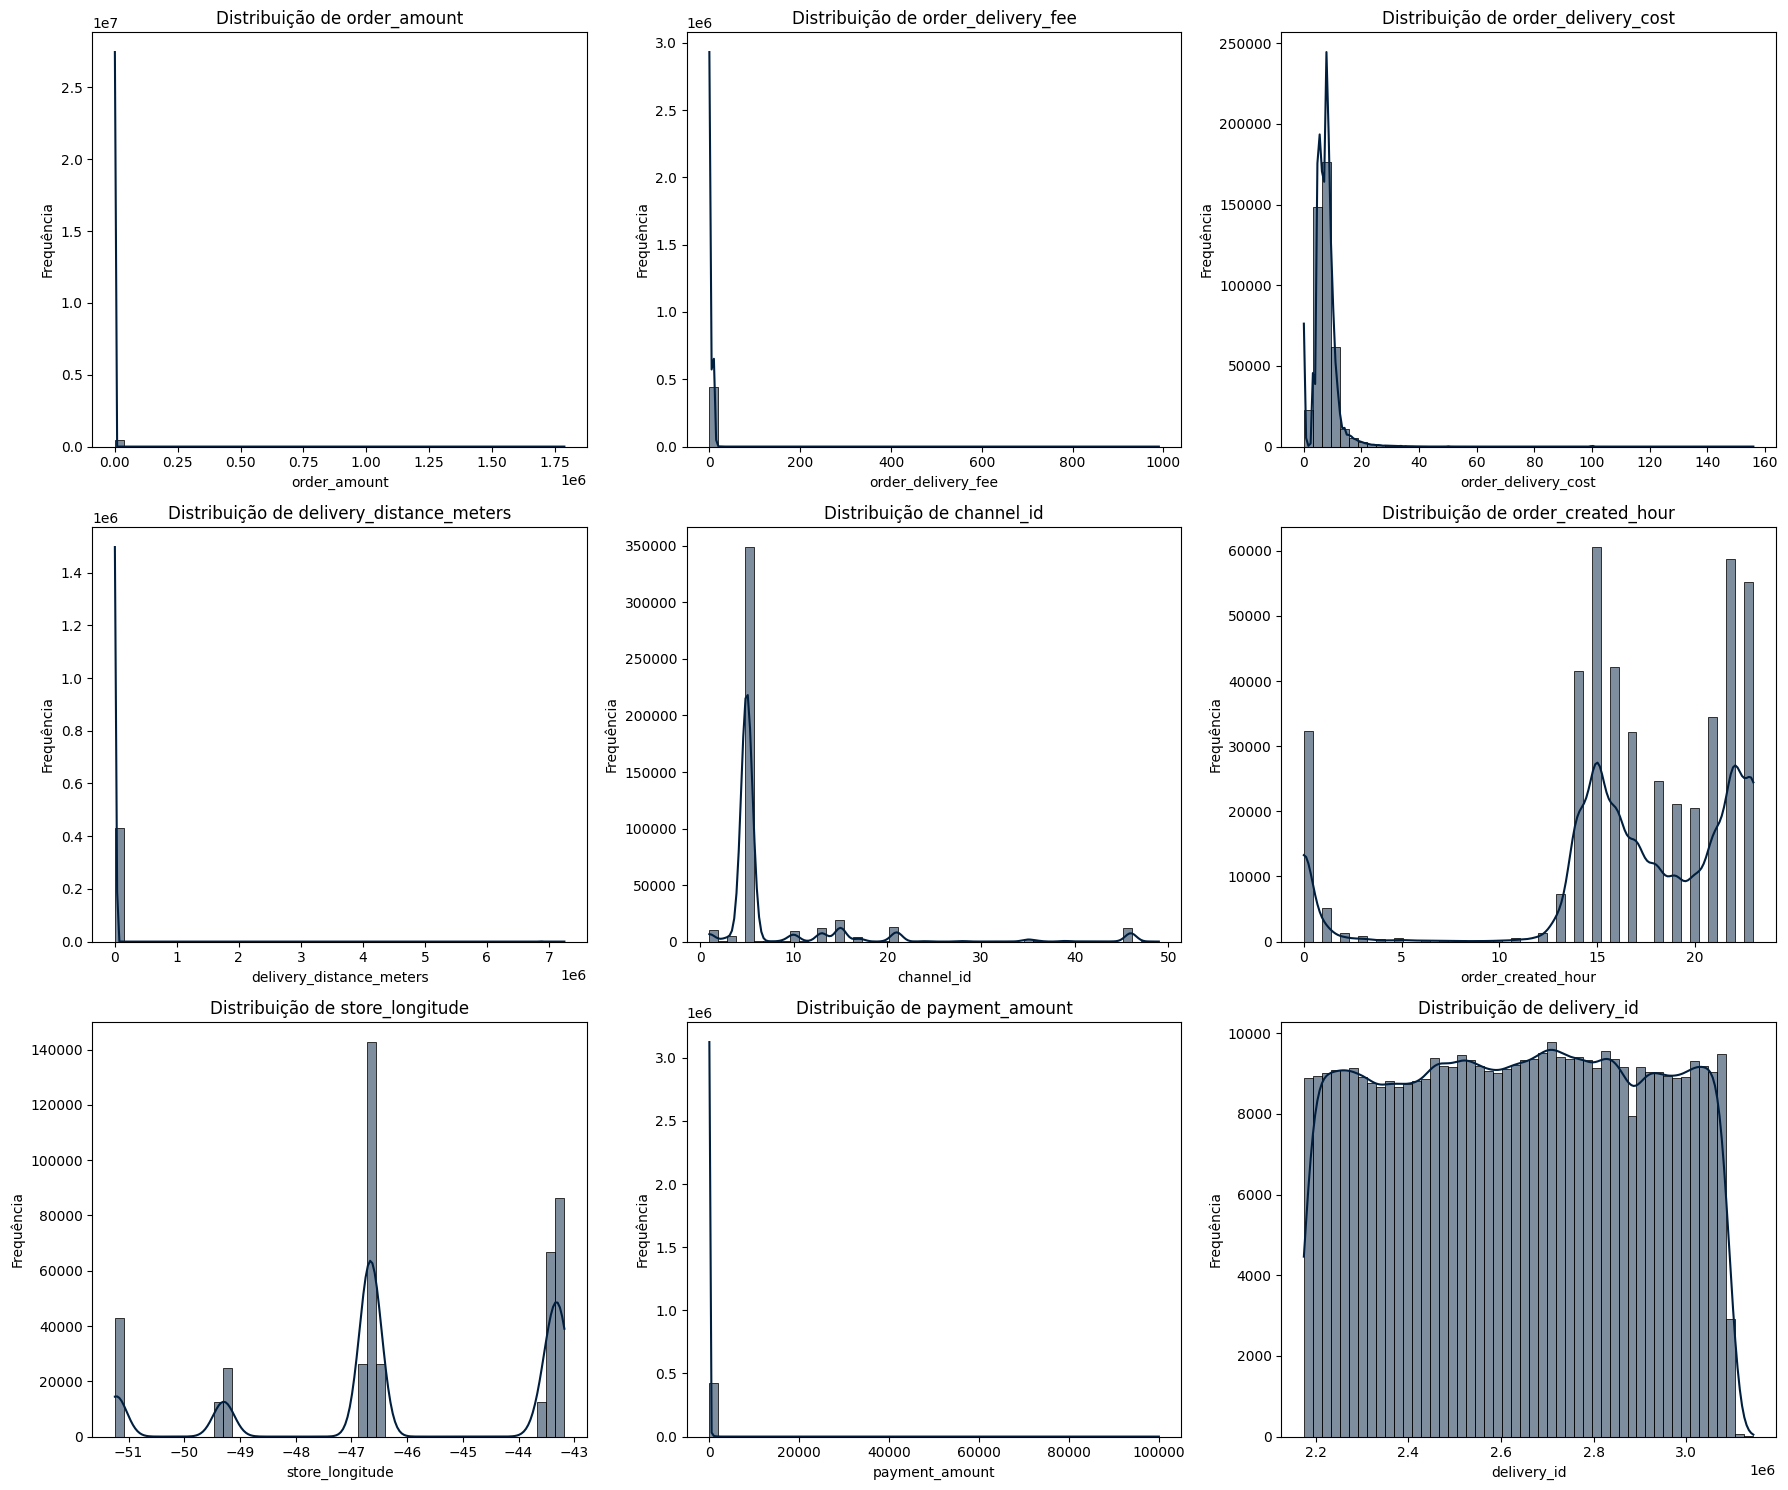

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Variáveis numéricas analisadas
numerical_columns = ['order_amount', 'order_delivery_fee', 'order_delivery_cost', 'delivery_distance_meters', 'channel_id', 'order_created_hour', 'store_longitude', 'payment_amount', 'delivery_id']

# Criar um gráfico para cada variável
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=50, color='#001F3F', line_kws={'color': '#EC8305'})
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


Para explorar as distribuições das variáveis numéricas, utilizamos **histogramas com Kernel Density Estimate (KDE)**. Essa escolha facilita a visualização das distribuições, permitindo identificar padrões de assimetria e caudas pesadas.

**Objetivos da Visualização**:
- **Analisar a assimetria (skew)**: O histograma mostra visualmente caudas à direita ou à esquerda, facilitando a identificação de distribuições assimétricas.
- **Compreender a distribuição**: O KDE suaviza a distribuição, destacando padrões que podem não ser visíveis em um histograma tradicional.
- **Identificar outliers**: A presença de caudas pesadas indica valores extremos que podem distorcer a análise.

**Justificativa**:
- O histograma com KDE revela não só a frequência dos dados, mas também as características da distribuição, como a presença de caudas e a direção da assimetria.
- Ele ajuda a entender como as variáveis se comportam.


## Tendências Gerais

In [11]:
## Análise Temporal e de Sazonalidade - Agrupamento por Hora

hora_agg = df.groupby('order_created_hour')['order_id'].count().reset_index(name='qtd_pedidos')
hora_agg.sort_values(by='qtd_pedidos', ascending=False).head(5)


,order_created_hour,qtd_pedidos
15,15,60577
22,22,58678
23,23,55252
16,16,42191
14,14,41551


A análise dos dados de pedidos agrupados por hora revelou os seguintes horários de pico de pedidos:

| Hora  | Quantidade de Pedidos |
|-------|-----------------------|
| 15:00 | 60,577                |
| 22:00 | 58,678                |
| 23:00 | 55,252                |
| 16:00 | 42,191                |
| 14:00 | 41,551                |

**Tendências Observadas**
1. **Maior Concentração de Pedidos Entre 14:00 e 23:00**
   A maior concentração de pedidos ocorre entre as 14:00 e as 23:00, com picos significativos às 15:00, 22:00 e 23:00. Isso sugere que os consumidores estão mais propensos a fazer compras durante a parte da tarde e noite, possivelmente após atividades diárias, como trabalho e jantares.

2. **Pico Claro às 15:00**
   O horário das 15:00 é o que apresenta o maior volume de pedidos (60,577). Esse pico pode indicar um comportamento específico dos consumidores, possivelmente ligado a pausas no trabalho ou comportamentos de consumo mais relaxados nesse horário.

3. **Picos Noturnos (22:00 e 23:00)**
   O aumento de pedidos à noite, principalmente às 22:00 e 23:00, pode ser atribuído ao horário em que os consumidores estão mais disponíveis para navegar e realizar compras, após o fim de compromissos diários. Esses picos noturnos representam uma janela importante de demanda para ações promocionais ou melhorias na experiência de compra.

4. **Distribuição Gradual ao Longo do Dia**
   Observa-se uma distribuição relativamente contínua de pedidos durante o período da tarde até a noite, com uma leve queda no número de pedidos conforme se aproxima da meia-noite. Isso reflete um comportamento de consumo mais disperso ao longo da tarde e início da noite, com um pico mais claro às 15:00 e um segundo pico significativo à noite.

**Implicações Operacionais e Estratégicas**
Com base nesses padrões temporais de pedidos, é possível realizar ajustes nas operações e estratégias de marketing, especialmente para maximizar a eficiência e a satisfação do cliente durante os horários de pico.



Taxa de cancelamento total: 3.92%


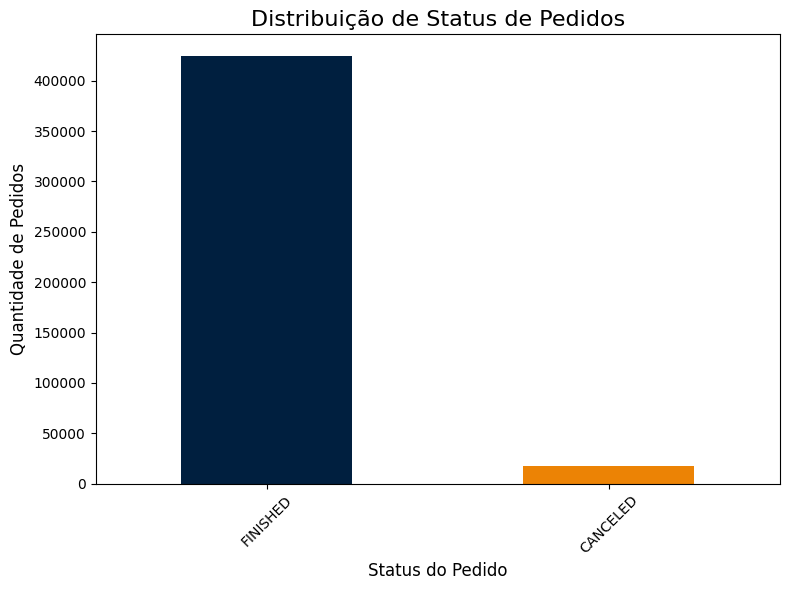

In [12]:
#  Análise de Cancelamentos
## Taxa Global de Cancelamento

import matplotlib.pyplot as plt

# Calcular a taxa de cancelamento
cancel_rate = (df['order_status'] != 'FINISHED').mean()
print(f"Taxa de cancelamento total: {cancel_rate:.2%}")

# Plotar a distribuição de status de pedidos
status_counts = df['order_status'].value_counts()

# Definir as cores para o gráfico
colors = ['#001F3F', '#EC8305']

plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color=colors)
plt.title('Distribuição de Status de Pedidos', fontsize=16)
plt.xlabel('Status do Pedido', fontsize=12)
plt.ylabel('Quantidade de Pedidos', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

A taxa de cancelamento foi calculada com base no status dos pedidos, verificando a proporção de pedidos que não foram concluídos (status diferente de "FINISHED"). O resultado obtido foi o seguinte:

- **Taxa de cancelamento total**: **3,92%**

**Interpretação dos Resultados**
A taxa de cancelamento de 3,92% indica que aproximadamente 4 a cada 100 pedidos não são concluídos com sucesso, sendo cancelados ou não finalizados. Essa taxa, embora não excessivamente alta, ainda pode afetar negativamente a experiência do cliente e a eficiência operacional.

**Implicações Operacionais**
A taxa de cancelamento de 3,92% sugere que uma proporção relativamente pequena dos pedidos não são finalizados, mas é importante monitorar esse número ao longo do tempo para verificar se há variações sazonais ou picos que possam indicar problemas em determinados períodos.

**Conclusão**
A taxa de cancelamento observada, de 3,92%, deve ser acompanhada regularmente para avaliar seu impacto no negócio, considerando que, mesmo sendo uma taxa baixa, qualquer cancelamento pode representar uma falha no processo de compras e um potencial prejuízo para a empresa.


In [13]:
# Definindo o formato de data esperado.
date_format = "%m/%d/%Y %I:%M:%S %p" 

#  Performance Logística
## Tempo Médio da Jornada de Pedido (Entre Fases)

# Calcular o tempo de aprovação (usando 'order_moment_accepted' para o pagamento/aceitação)
df['tempo_aprovacao'] = (pd.to_datetime(df['order_moment_accepted'], format=date_format, errors='coerce') - pd.to_datetime(df['order_moment_created'], format=date_format, errors='coerce')).dt.total_seconds() / 60

# Calcular o tempo de envio (usando 'order_moment_in_expedition' para o momento de envio)
df['tempo_envio'] = (pd.to_datetime(df['order_moment_in_expedition'], format=date_format, errors='coerce') - pd.to_datetime(df['order_moment_accepted'], format=date_format, errors='coerce')).dt.total_seconds() / 60

# Calcular o tempo de entrega (usando 'order_moment_delivering' ou 'order_moment_delivered' para o momento de entrega)
df['tempo_entrega'] = (pd.to_datetime(df['order_moment_delivered'], format=date_format, errors='coerce') - pd.to_datetime(df['order_moment_in_expedition'], format=date_format, errors='coerce')).dt.total_seconds() / 60

# Exibir a descrição estatística dos tempos
df[['tempo_aprovacao', 'tempo_envio', 'tempo_entrega']].describe()


,tempo_aprovacao,tempo_envio,tempo_entrega
count,432479.000000,365638.000000,21904.000000
mean,36.360879,25.947405,512.156078
std,711.554498,121.973067,4177.553094
min,-0.016667,-1073.033333,0.000000
25%,0.300000,12.000000,18.500000
50%,0.600000,18.050000,26.566667
75%,0.966667,25.066667,41.887500
max,85661.833333,15940.300000,154265.900000


1. **Tempo de Aprovação**:
   - A média de **36.36 minutos** para a aprovação dos pedidos indica que, em geral, os pedidos são processados rapidamente, embora o desvio padrão de **711.55 minutos** sugira que há uma grande variação no tempo de aprovação. Isso pode ser causado por problemas pontuais ou pedidos com características específicas.
   - O valor mínimo de **-0.02 minutos** é atípico, indicando que há casos em que a data de aceitação foi registrada antes da criação do pedido. Isso pode indicar falhas no registro ou problemas nos dados.

2. **Tempo de Envio**:
   - O tempo médio de **25.95 minutos** entre a aceitação e o envio do pedido é relativamente curto. No entanto, o desvio padrão de **121.97 minutos** indica que existem variações significativas nesse processo, com alguns pedidos sendo enviados muito rapidamente e outros levando muito mais tempo.
   - O valor mínimo de **-1,073.03 minutos** é um valor extremamente negativo, indicando dados problemáticos ou incorretos nos registros de envio, possivelmente de pedidos com informações de timestamp erradas.

3. **Tempo de Entrega**:
   - O tempo médio de **512.16 minutos** (aproximadamente 8 horas e meia) para a entrega dos pedidos é relativamente alto, o que pode refletir os desafios logísticos ou a distância de entrega.
   - O valor máximo de **154,265.90 minutos** (cerca de 107 dias) é excepcionalmente alto, sugerindo que há registros de pedidos com erros ou atrasos extremos no sistema de rastreamento.

**Análise de Dados Atípicos**
- **Valores negativos e extremos**: Os valores negativos nos tempos de aprovação e envio, assim como os tempos de entrega extremamente longos, indicam que há problemas de qualidade nos dados, como registros incorretos de timestamps ou falhas na sincronização das informações.
- **Dispersão alta**: O desvio padrão elevado nos três tempos indica uma grande variação, o que sugere que os processos logísticos podem ser inconsistentes. Embora a maioria dos pedidos siga uma jornada rápida e eficiente, há casos que exigem atenção para otimizar o fluxo e corrigir discrepâncias.

In [14]:
# KPIs de Apresentação

kpi_cancelamento = (df['order_status'] != 'FINISHED').mean()
kpi_entrega_falha = (df['delivery_status'] != 'DELIVERED').mean()
media_valor = df['order_amount'].mean()
media_distancia = df['delivery_distance_meters'].mean() / 1000

print(f"""
📌 KPIs Logísticos:
- Taxa de Cancelamento: {kpi_cancelamento:.2%}
- Taxa de Entregas Falhadas: {kpi_entrega_falha:.2%}
- Valor médio por pedido: R$ {media_valor:.2f}
- Distância média de entrega: {media_distancia:.2f} km
""")



📌 KPIs Logísticos:
- Taxa de Cancelamento: 3.92%
- Taxa de Entregas Falhadas: 4.20%
- Valor médio por pedido: R$ 100.62
- Distância média de entrega: 9.69 km



1. **Taxa de Cancelamento (3,92%)**:  
   Aproximadamente 4% dos pedidos não são concluídos com sucesso. Embora esse valor seja relativamente baixo, ele ainda pode impactar a experiência do cliente. A taxa de cancelamento sugere que a maioria dos pedidos é processada corretamente.

2. **Taxa de Entregas Falhadas (4,20%)**:  
   Cerca de 4% das entregas não são realizadas com sucesso. Esse percentual é relativamente baixo, mas pode indicar que há falhas no processo de entrega que devem ser investigadas.

3. **Valor Médio por Pedido (R$ 100,62)**:  
   O valor médio por pedido de R$ 100,62 sugere que os pedidos tendem a ter um valor moderado. Isso pode ser útil para entender o perfil de compra dos clientes e ajudar a planejar estratégias de vendas e marketing.

4. **Distância Média de Entrega (9,69 km)**:  
   A distância média de entrega de 9,69 km sugere que a maioria das entregas ocorre dentro de uma área relativamente compacta. Esse dado pode ajudar a otimizar os custos e os tempos de entrega. A variação nas distâncias pode revelar áreas onde desafios logísticos, como custos elevados ou tempo de entrega prolongado, possam ocorrer.


## Perguntas de Partida e Hipóteses

1. "Existe alguma correlação significativa entre o valor do pedido (order_amount), a distância de entrega (delivery_distance_meters) e a hora de criação do pedido (order_created_hour)?"

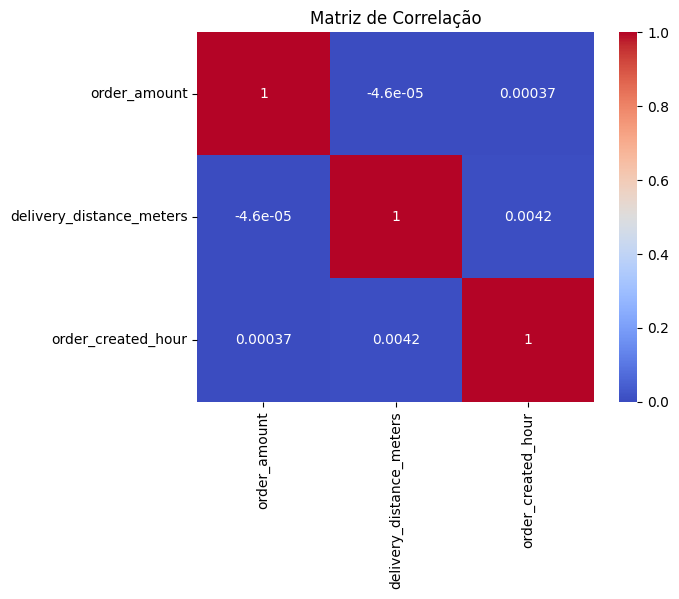

In [15]:
# Análises de Correlação
## Correlação Entre Métricas-Chave

import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['order_amount', 'delivery_distance_meters', 'order_created_hour']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


In [16]:
# Calcular a matriz de correlação
corr = df[['order_amount', 'delivery_distance_meters', 'order_created_hour']].corr()

# Exibir a matriz de correlação como um DataFrame
print(corr)


                          order_amount  delivery_distance_meters  \
order_amount                  1.000000                 -0.000046   
delivery_distance_meters     -0.000046                  1.000000   
order_created_hour            0.000369                  0.004244   

                          order_created_hour  
order_amount                        0.000369  
delivery_distance_meters            0.004244  
order_created_hour                  1.000000  


- **Correlação entre `order_amount` e `delivery_distance_meters`**: O valor de -0.000046 sugere que não há uma correlação significativa entre o valor do pedido e a distância da entrega. A correlação é praticamente nula, indicando que o valor do pedido não está diretamente relacionado à distância da entrega.

- **Correlação entre `order_amount` e `order_created_hour`**: A correlação de 0.000369 também indica uma relação extremamente fraca e praticamente irrelevante entre o valor do pedido e a hora de criação do pedido. Isso sugere que a hora em que o pedido foi criado não influencia significativamente o valor do pedido.

- **Correlação entre `delivery_distance_meters` e `order_created_hour`**: A correlação de 0.004244 é muito próxima de zero, indicando que não há uma correlação significativa entre a distância da entrega e a hora de criação do pedido.


**Hipóteses**

**Hipótese 1: Correlação entre o valor do pedido e a distância de entrega**

- **Hipótese Nula (H₀):** Não há correlação significativa entre o valor do pedido (order_amount) e a distância de entrega (delivery_distance_meters).
- **Hipótese Alternativa (H₁):** Existe uma correlação significativa entre o valor do pedido (order_amount) e a distância de entrega (delivery_distance_meters).

**Hipótese 2: Correlação entre a hora de criação do pedido e o valor do pedido**

- **Hipótese Nula (H₀):** Não há correlação significativa entre a hora de criação do pedido (order_created_hour) e o valor do pedido (order_amount).
- **Hipótese Alternativa (H₁):** Existe uma correlação significativa entre a hora de criação do pedido (order_created_hour) e o valor do pedido (order_amount).


2. "Qual é o SLA (Service Level Agreement) de entrega por hub e qual a taxa de falhas de entrega em cada hub?"

In [17]:
# Hubs e Motoristas
## SLA por Hub (Tabela)

sla_hub = df.groupby('hub_id')['delivery_status'].value_counts(normalize=True).unstack().fillna(0)
sla_hub['falha'] = 1 - sla_hub.get('DELIVERED', 0)
sla_hub.sort_values('falha', ascending=False).head(5)


delivery_status,CANCELLED,DELIVERED,DELIVERING,falha
hub_id,,,,
91,1.000000,0.000000,0.00000,1.000000
4,1.000000,0.000000,0.00000,1.000000
5,1.000000,0.000000,0.00000,1.000000
73,0.600000,0.400000,0.00000,0.600000
55,0.159674,0.840097,0.00023,0.159903


**Hubs com Falhas Totais (hub_id 91, 4 e 5):** Esses hubs apresentaram uma taxa de falha de 100%, ou seja, todas as entregas realizadas por esses hubs foram canceladas. Isso indica um problema grave nesses hubs, já que nenhum pedido foi entregue com sucesso.
  
**Hub 73:** Apresenta uma taxa de falha de 60%, ou seja, 60% das entregas não foram bem-sucedidas, enquanto 40% foram entregues com sucesso. Embora não tão extrema quanto a falha total, ainda é uma taxa significativa, o que sugere que esse hub também apresenta problemas na execução das entregas.

**Hub 55:** Este hub tem a melhor performance entre os analisados, com uma taxa de falha de aproximadamente 16%. A grande maioria das entregas foi bem-sucedida (aproximadamente 84%), o que indica um desempenho muito mais eficiente em comparação com os outros hubs.


**Hipóteses**

**Hipótese 1: Taxa de Falha de Entrega entre os Hubs**
- **Hipótese Nula (H₀):** A taxa de falha de entrega entre os hubs é igual ou não varia significativamente entre os hubs.
- **Hipótese Alternativa (H₁):** Existe uma variação significativa na taxa de falha de entrega entre os hubs.

**Hipótese 2: Desempenho de Hubs com Alta Taxa de Falha**
- **Hipótese Nula (H₀):** Hubs com alta taxa de falha não apresentam uma distribuição diferenciada de status de entrega.
- **Hipótese Alternativa (H₁):** Hubs com alta taxa de falha apresentam uma distribuição diferenciada de status de entrega, com maior prevalência de entregas não realizadas.

3. Qual é a influência da distância de entrega na probabilidade de sucesso da entrega?

Coeficiente: [[-2.26261674e-07]]
Intercepto: [3.12938144]


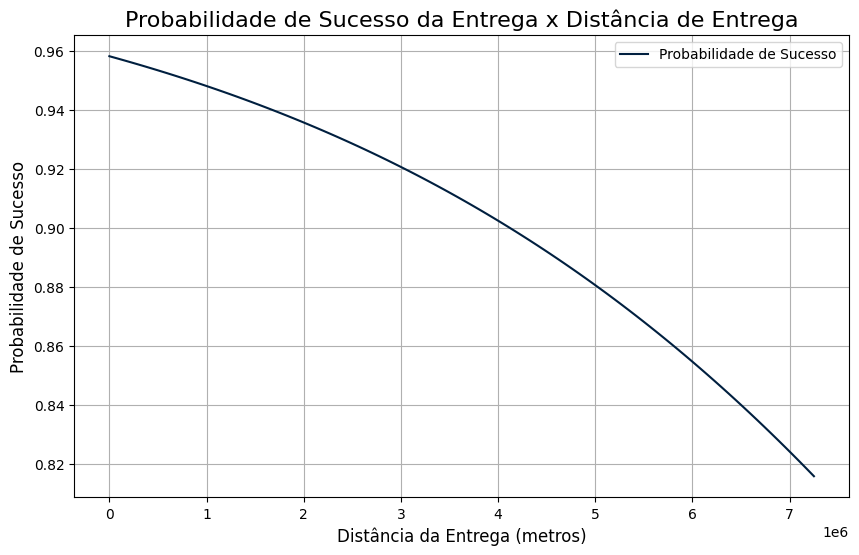

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Correlação entre distância e falha de entrega (Modelo logístico simplificado)

# Criando uma coluna 'entrega_ok' para representar o status de entrega
df['entrega_ok'] = df['delivery_status'].apply(lambda x: 1 if x == 'DELIVERED' else 0)

# Selecionando as variáveis independentes (X) e a variável dependente (y)
X = df[['delivery_distance_meters']]
y = df['entrega_ok']

# Separando o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Criando o imputador para substituir os valores NaN pela média
imputer = SimpleImputer(strategy='mean')

# Aplicando o imputador nos dados de treino e teste
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Criando o modelo de regressão logística e treinando com os dados imputados
model = LogisticRegression()
model.fit(X_train_imputed, y_train)

# Exibindo o coeficiente e o intercepto do modelo treinado
print("Coeficiente:", model.coef_)
print("Intercepto:", model.intercept_)

# Visualizando 
import matplotlib.pyplot as plt
import numpy as np

# Gerar valores de distância para prever
distances = np.linspace(df['delivery_distance_meters'].min(), df['delivery_distance_meters'].max(), 100)

# Calcular a probabilidade de entrega para essas distâncias
probabilities = model.predict_proba(distances.reshape(-1, 1))[:, 1]

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(distances, probabilities, color='#001F3F', label='Probabilidade de Sucesso')  # Azul escuro
plt.title('Probabilidade de Sucesso da Entrega x Distância de Entrega', fontsize=16)
plt.xlabel('Distância da Entrega (metros)', fontsize=12)
plt.ylabel('Probabilidade de Sucesso', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


O modelo de regressão logística foi treinado para prever a probabilidade de sucesso de entrega com base na distância de entrega. O coeficiente negativo do modelo sugere que, conforme a distância aumenta, a probabilidade de sucesso de entrega diminui, o que suporta a **Hipótese Principal (H1)**.

**1. Coeficiente do Modelo:**
- **Coeficiente**: `[-2.42659166e-07]`
  - O coeficiente negativo sugere uma **relação inversa** entre a distância de entrega e a probabilidade de sucesso. Ou seja, conforme a distância aumenta, a probabilidade de entrega ser bem-sucedida diminui.
  - A magnitude do coeficiente é muito pequena (na casa de `10^-7`), o que indica que, embora exista uma correlação negativa, o efeito da distância sobre a probabilidade de sucesso da entrega não é grande.
  
**2. Intercepto do Modelo:**
- **Intercepto**: `[3.13188651]`
  - O intercepto indica a probabilidade de sucesso da entrega quando a distância é zero. Ou seja, para entregas que não possuem distância (ou para entregas locais), a probabilidade de sucesso é muito alta, o que é razoável, pois entregas locais têm mais chances de sucesso.
 

**Hipóteses**:
-  **Hipótese Principal (H1)**: Existe uma correlação negativa entre a distância de entrega e a probabilidade de sucesso da entrega. Ou seja, quanto maior a distância, menor a probabilidade de a entrega ser bem-sucedida.
  
- **Hipótese Secundária (H2)**: A distância de entrega pode ser um fator determinante, mas outros fatores não observados (como condições climáticas, tráfego, etc.) também podem influenciar a probabilidade de entrega. Portanto, a distância sozinha pode não ser o único determinante.

- **Hipótese de Null (H0)**: Não existe relação entre a distância de entrega e a probabilidade de sucesso da entrega. A distância de entrega não influencia a probabilidade de uma entrega ser bem-sucedida.

  

4. "Como está a performance logística da jornada dos pedidos em relação ao tempo de aprovação, envio e entrega? Existem gargalos ou pontos fora do padrão que afetam a experiência do cliente?"


In [19]:
# Performance Logística
# Tempo Médio da Jornada de Pedido (Entre Fases)

# Definindo o formato de data/hora
datetime_format = "%m/%d/%Y %I:%M:%S %p"

# Certificando-se de que as colunas de tempo estão no formato datetime
colunas_data = [
    'order_moment_accepted',
    'order_moment_ready',
    'order_moment_collected',
    'order_moment_in_expedition',
    'order_moment_delivering',
    'order_moment_delivered'
]

for col in colunas_data:
    df[col] = pd.to_datetime(df[col], format=datetime_format, errors='coerce')

# Calcular o tempo de aprovação (tempo entre 'order_moment_accepted' e 'order_moment_ready')
df['tempo_aprovacao'] = (df['order_moment_ready'] - df['order_moment_accepted']).dt.total_seconds() / 60

# Calcular o tempo de envio (tempo entre 'order_moment_ready' e 'order_moment_collected')
df['tempo_envio'] = (df['order_moment_collected'] - df['order_moment_ready']).dt.total_seconds() / 60

# Calcular o tempo de entrega (tempo entre 'order_moment_collected' e 'order_moment_delivered')
df['tempo_entrega'] = (df['order_moment_delivered'] - df['order_moment_collected']).dt.total_seconds() / 60

# Exibindo as estatísticas descritivas para os tempos calculados
df[['tempo_aprovacao', 'tempo_envio', 'tempo_entrega']].describe()



,tempo_aprovacao,tempo_envio,tempo_entrega
count,414073.000000,384494.000000,23514.000000
mean,21.533116,2.730588,501.697447
std,138.744955,13.771552,4098.975008
min,-1075.616667,-1.483333,0.083333
25%,7.366667,0.783333,19.916667
50%,13.683333,1.633333,28.200000
75%,20.500000,3.000000,43.466667
max,33208.816667,2050.383333,154265.933333


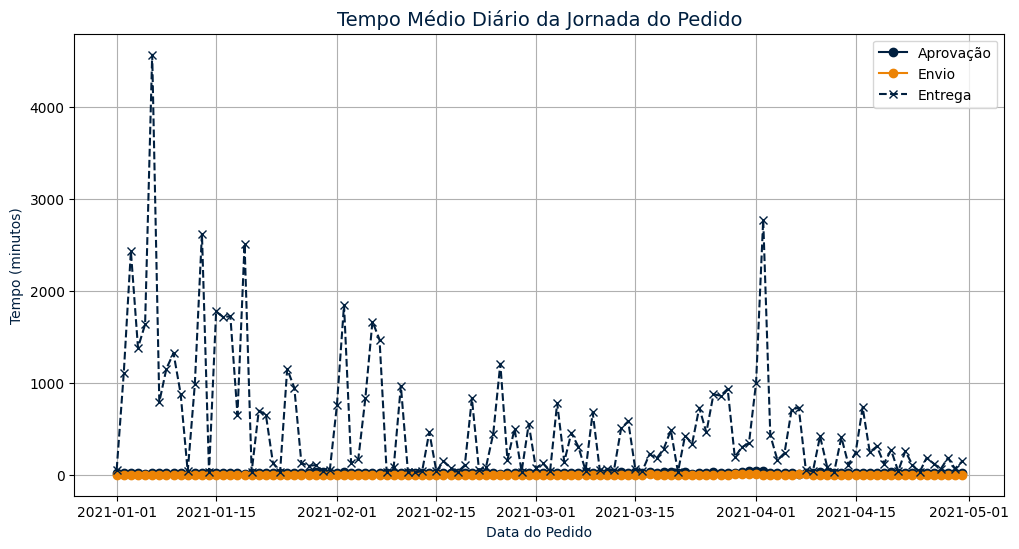

In [20]:
df['order_moment_created'] = pd.to_datetime(df['order_moment_created'], format=datetime_format, errors='coerce')
df['dia'] = df['order_moment_created'].dt.date

media_diaria = df.groupby('dia')[['tempo_aprovacao', 'tempo_envio', 'tempo_entrega']].mean()

plt.figure(figsize=(12, 6))
plt.plot(media_diaria.index, media_diaria['tempo_aprovacao'], label='Aprovação', color='#001F3F', marker='o')
plt.plot(media_diaria.index, media_diaria['tempo_envio'], label='Envio', color='#EC8305', marker='o')
plt.plot(media_diaria.index, media_diaria['tempo_entrega'], label='Entrega', color='#001F3F', linestyle='--', marker='x')

plt.title('Tempo Médio Diário da Jornada do Pedido', fontsize=14, color="#001F3F")
plt.ylabel('Tempo (minutos)', color="#001F3F")
plt.xlabel('Data do Pedido', color="#001F3F")
plt.legend()
plt.grid(True)
plt.show()


- **Tempo de Aprovação**
  - A média é de aproximadamente **21,5 minutos**, o que indica um tempo razoável.
  - Porém, o **alto desvio padrão (138,74)** e o **valor mínimo negativo (-1075,62)** sugerem possíveis erros de registro ou eventos atípicos.
  - A presença de um **valor máximo extremamente alto (33.208 minutos ≈ 23 dias)** também aponta para **outliers**.

- **Tempo de Envio**
  - Média de apenas **2,7 minutos**, o que sugere uma operação rápida.
  - O desvio padrão é relativamente alto considerando a média, o que pode indicar **variação operacional significativa**.
  - O **valor negativo mínimo** também sugere inconsistência nos registros de tempo.

- **Tempo de Entrega**
  - Média muito alta (**501 minutos ≈ 8,3 horas**) com **altíssimo desvio padrão (4.099 minutos)**.
  - Isso revela grande variação e **forte presença de outliers**.
  - O valor máximo (154.265 minutos ≈ 107 dias) é fora do esperado, reforçando a necessidade de limpeza e investigação.


**Hipóteses:**

- **Hipótese Principal (H1)**: Existem gargalos em uma ou mais etapas da jornada logística (aprovação, envio ou entrega), refletidos em tempos médios elevados e alta variabilidade.

- **Hipótese Secundária (H2)**: A maior parte dos pedidos segue um fluxo eficiente, mas outliers e erros de registro (como tempos negativos ou extremamente altos) distorcem as métricas globais e impactam a percepção de performance.

- **Hipótese Nula (H0)**: Os tempos entre as fases da jornada logística seguem uma distribuição normal, sem outliers ou variações significativas que indiquem gargalos operacionais.